# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split


## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [3]:
# Import the data
lending_data = pd.read_csv("./Resources/lending_data.csv")

lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

##### My Prediction

I predict that the logistic regression will perform better since there are only 7 features and all seem like they could plausibly be related to whether a loan would be denied or approved (i.e. less noise in the parameters to tune out). We are only categorizing the data into two possible groups (approved/denied) so it seems like logistic regression would be the better choice.

## Split the Data into Training and Testing Sets

In [32]:
# Split the data into X_train, X_test, y_train, y_test
X = lending_data.drop(columns=["loan_status"])
y = lending_data["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [33]:
from sklearn.preprocessing import StandardScaler

# Scale training and testing data based on training features
scaler = StandardScaler().fit(X_train)

# Apply scaling transformation to training/testing features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Train a Logistic Regression model and print the model score

from sklearn.linear_model import LogisticRegression

# Create logistic model
model_lr = LogisticRegression()

# Fit model to training data
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [35]:
# View score for testing data
model_lr.score(X_test_scaled, y_test)

print(f'Training Score: {model_lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model_lr.score(X_test_scaled, y_test)}')

Training Score: 0.9941478042174502
Testing Score: 0.9940675780242455


In [36]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {model_rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {model_rfc.score(X_test_scaled, y_test)}')

Training Score: 0.9973076675049978
Testing Score: 0.9922620582924941


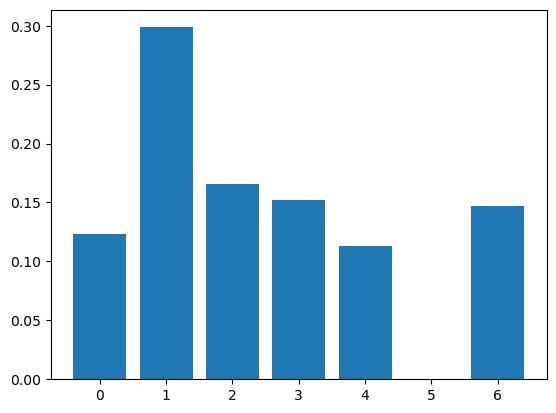

In [37]:
# Examine feature importances

features = model_rfc.feature_importances_
plt.bar(x = range(len(features)), height=features)
plt.show()

It seems like the logistical regression performed slightly better than the random forest model, although both models performed very well (slightly above 99% accuracy on the testing data). This matched my prediction although only by about 2 thousandths of a percent in accuracy.